# __King County Crime Data__

__Purpose:__  Visualize the reported occurrences of criminal offenses in King County, Washington to draw insight from a large dataset.

__Dataset:__  The dataset and partial dictionary can be found [here](https://moto.data.socrata.com/dataset/King-County-Sheriff-s-Office/4h35-4mtu).  The dataset should include 20 columns (_'address_2'_ and _'country'_ are missing, but that doesn't raise concern) and 15.6k rows.

I'll start by investigating the dataset to see which columns will be most valuable, and whether or not those columns need cleaning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sodapy import Socrata
%matplotlib inline

In [2]:
# All necessary data for import
api_endpoint = 'moto.data.socrata.com'
file = '4h35-4mtu'

app_token = '4ojwRgJVVePHf8Ed0QVLClLdY'

In [3]:
client = Socrata(api_endpoint,
                app_token)
client

In [4]:
results = client.get(file, limit = 20000)

In [5]:
king_crime = pd.DataFrame.from_records(results)

In [6]:
king_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15642 entries, 0 to 15641
Data columns (total 18 columns):
address_1                15642 non-null object
case_number              15642 non-null object
city                     15642 non-null object
clearance_type           15642 non-null object
created_at               15642 non-null object
day_of_week              15642 non-null object
hour_of_day              15642 non-null object
incident_datetime        15642 non-null object
incident_description     15642 non-null object
incident_id              15642 non-null object
incident_type_primary    15642 non-null object
latitude                 15642 non-null object
location                 15642 non-null object
longitude                15642 non-null object
parent_incident_type     15642 non-null object
state                    15642 non-null object
updated_at               15642 non-null object
zip                      15381 non-null object
dtypes: object(18)
memory usage: 2.1+ MB


In [7]:
king_crime.head()

,address_1,case_number,city,clearance_type,created_at,day_of_week,hour_of_day,incident_datetime,incident_description,incident_id,incident_type_primary,latitude,location,longitude,parent_incident_type,state,updated_at,zip
0,17700 Block SE 272ND ST,C18035936,COVINGTON,,2019-08-14T14:05:52.000,Thursday,11,2018-08-30T11:55:00.000,222 - DEATH INVESTIGATION,934729865,222 - DEATH INVESTIGATION,47.35897440000001,"{'type': 'Point', 'coordinates': [-122.1042083...",-122.1042083,Death,WA,2019-08-14T18:08:30.000,98042
1,AUBURN WAY S & ACADEMY DR SE,C18051352,AUBURN,,2019-08-14T14:45:41.000,Wednesday,11,2018-11-28T11:12:13.000,200 - CONTROLLED SUBSTANCE VIOLATION,934732420,200 - CONTROLLED SUBSTANCE VIOLATION,47.2749806,"{'type': 'Point', 'coordinates': [-122.1550783...",-122.1550783,Drugs,WA,2019-08-14T16:47:00.000,98092
2,2100 Block AUBURN WAY S,C18052174,AUBURN,,2019-08-14T14:55:45.000,Tuesday,8,2018-12-04T08:11:45.000,200 - CONTROLLED SUBSTANCE VIOLATION,934732725,200 - CONTROLLED SUBSTANCE VIOLATION,47.2889626,"{'type': 'Point', 'coordinates': [-122.2009456...",-122.2009456,Drugs,WA,2019-08-14T16:47:00.000,98002
3,DOGWOOD ST SE & FOREST RIDGE DR SE,C18053484,AUBURN,,2019-08-14T14:55:45.000,Thursday,8,2018-12-13T08:27:00.000,200 - CONTROLLED SUBSTANCE VIOLATION,934732724,200 - CONTROLLED SUBSTANCE VIOLATION,47.2847659,"{'type': 'Point', 'coordinates': [-122.1928085...",-122.1928085,Drugs,WA,2019-08-14T16:47:00.000,98002
4,18200 Block NE 205TH ST,C19030875,WOODINVILLE,,2019-08-14T12:55:49.000,Tuesday,10,2019-01-01T10:00:00.000,"274 - BURGLARY, RESIDENTIAL",934726959,"274 - BURGLARY, RESIDENTIAL",47.7758139,"{'type': 'Point', 'coordinates': [-122.0957525...",-122.0957525,Breaking & Entering,WA,2019-08-14T17:56:56.000,98077


In [8]:
king_crime['incident_description'].value_counts(dropna = False).sort_values(ascending = False)

288 - LARCENY, TFA - THEFT FROM AUTO                      866
300 - THEFT, VEHICLE                                      850
503 - CRIMINAL WARRANT, FELONY                            843
112 - ASSAULT, SIMPLE                                     801
274 - BURGLARY, RESIDENTIAL                               749
511 - CRIMINAL WARRANT, MISDEMEANOR (OUTSIDE AGENCY)      714
371 - MENTAL COMPLAINTS                                   654
334 - VANDALISM UNDER $1500                               580
377 - SUSPICIOUS CIRCUMSTANCES                            570
311 - VEHICLE RECOVERY, OUTSIDE STOLEN OR NO CASE NO.     543
332 - TRESPASS                                            498
284 - LARCENY, OTHER                                      479
504 - CRIMINAL WARRANT, MISDEMEANOR                       426
222 - DEATH INVESTIGATION                                 328
236 - VIOLATION OF COURT ORDERS                           313
510 - CRIMINAL WARRANT, FELONY (OUTSIDE AGENCY)           281
182 - FR

In [14]:
king_crime['parent_incident_type'].value_counts(dropna = False).sort_values(ascending = False)

Other                         5280
Property Crime                1757
Assault                       1208
Theft from Vehicle             993
Breaking & Entering            987
Theft                          979
Theft of Vehicle               850
Traffic                        563
Vehicle Recovery               545
Other Sexual Offense           454
Community Policing             367
Death                          328
Drugs                          325
Disorder                       225
Robbery                        161
Fire                           160
Weapons Offense                130
Liquor                          86
Sexual Assault                  76
Arson                           65
Assault with Deadly Weapon      53
Missing Person                  40
Kidnapping                       7
Homicide                         3
Name: parent_incident_type, dtype: int64

In [20]:
# No. of unique values in 'parent_incident_type' column
len(king_crime['parent_incident_type'].value_counts(dropna = False))

24

In [17]:
# Distribution of crimes with parent_incident_type of 'Other'
mask = king_crime[king_crime['parent_incident_type']=='Other']
mask['incident_description'].value_counts(dropna = False)

503 - CRIMINAL WARRANT, FELONY                                    843
511 - CRIMINAL WARRANT, MISDEMEANOR (OUTSIDE AGENCY)              714
371 - MENTAL COMPLAINTS                                           654
377 - SUSPICIOUS CIRCUMSTANCES                                    570
504 - CRIMINAL WARRANT, MISDEMEANOR                               426
236 - VIOLATION OF COURT ORDERS                                   313
510 - CRIMINAL WARRANT, FELONY (OUTSIDE AGENCY)                   281
234 - THREATS                                                     231
162 - DISTURBANCE, FAMILY                                         197
324 - PROPERTY, FOUND                                             195
232 - SUICIDE, ATTEMPT                                            133
422 - ATTEMPTING TO ELUDE (FELONY FLIGHT)                         101
315 - PROWLER, VEHICLE                                             83
169 - CPS REFERRAL                                                 72
227 - OBSTRUCTING AN

In [21]:
# No. of unique values in 'incident_description' column
len(mask['incident_description'].value_counts(dropna = False))

38

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

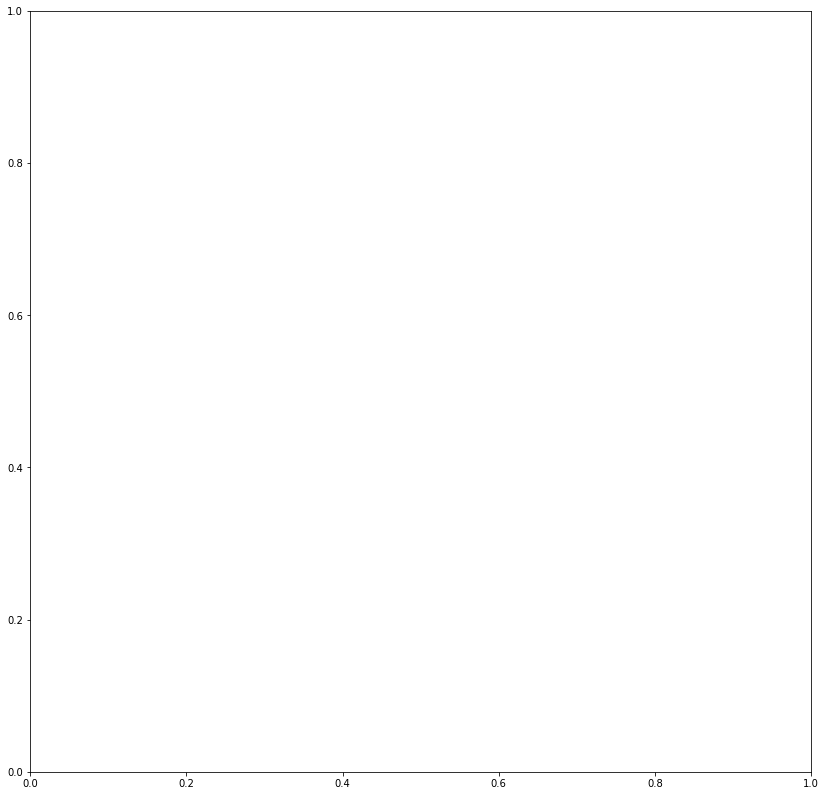

In [54]:
import seaborn as sns

# Privot data
pivot = king_crime.pivot(columns = 'zip', values = 'city')
# Plotting crimes by zip code and city name
fig, ax = plt.subplots(figsize = (14,14))
ax = sns.heatmap(pivot)
# ax = set_xticklabels(rotation = 30)


# __Initial Evaluation__

* _incident_description_ contains 165 unique values
* _parent_incident_type_ contains 24 unique values
    * Of these 24 types, one is labeled 'Other'.  This 'Other' type contains 38 of the 165 value-categories of the 165 incident_description in the column